<a href="https://colab.research.google.com/github/beastkp/Brain_tumor_detection/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/outer_folder.zip" -d "/content/drive/My Drive/"

unzip:  cannot find or open /content/drive/My Drive/outer_folder.zip, /content/drive/My Drive/outer_folder.zip.zip or /content/drive/My Drive/outer_folder.zip.ZIP.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

path = os.listdir('/content/drive/MyDrive/data/train/')
classes = {'Glioma':0, 'Pituitary_tumor':1, 'Meningioma': 2}

In [5]:
# !pip install opencv-python
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/data/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

np.unique(Y)

array([0, 1, 2])

In [7]:
pd.Series(Y).value_counts()

0    6301
1    6146
2    5951
dtype: int64

In [8]:
X.shape, X_updated.shape

((18398, 200, 200), (18398, 40000))

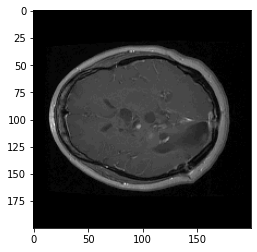

In [9]:
plt.imshow(X[0], cmap='gray')

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(18398, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((14718, 40000), (3680, 40000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(14718, 40000) (3680, 40000)


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1, multi_class='multinomial')

In [18]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.8879603206957467
Testing Score: 0.8377717391304348


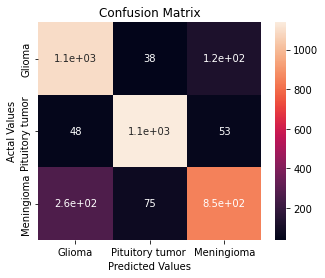

Confusion Matrix:
 [[1095   38  120]
 [  48 1138   53]
 [ 263   75  850]]


In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

lg.predict(xtrain)
#Testing the model using X_test and storing the output in y_pred
y_pred = lg.predict(xtest)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(ytest, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Glioma','Pituitory tumor ','Meningioma'], 
                     columns = ['Glioma','Pituitory tumor ','Meningioma'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
print("Confusion Matrix:\n", cm)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the target values using the trained model
y_pred = lg.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1 = f1_score(ytest, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8377717391304348
Precision: 0.839788974555864
Recall: 0.8359578321545307
F1 Score: 0.8355189949338042


In [ ]:
import shutil

folder_path = '/content/drive/MyDrive/Testing/notumor'

shutil.rmtree(folder_path)

In [21]:
import cv2
X = []
Y = []
classes = {'Glioma':0, 'Pituitary_tumor':1, 'Meningioma': 2}
for cls in classes:
    pth = '/content/drive/MyDrive/Testing/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [22]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [23]:
xtest = X_updated
ytest = Y
print(xtest.max(), xtest.min())
xtest = xtest/255
print(xtest.max(), xtest.min())

255 0
1.0 0.0


In [24]:
pca = PCA(.98)
pca_test = xtest

In [25]:
print("Testing Score:", lg.score(xtest, ytest))

Testing Score: 0.6023803740587806


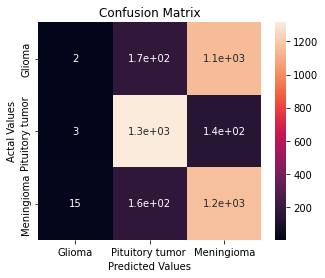

Confusion Matrix:
 [[   2  173 1146]
 [   3 1315  139]
 [  15  161 1163]]


In [26]:
import seaborn as sns

lg.predict(xtrain)
y_pred = lg.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Glioma','Pituitory tumor ','Meningioma'], 
                     columns = ['Glioma','Pituitory tumor ','Meningioma'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
print("Confusion Matrix:\n", cm)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the target values using the trained model
y_pred = lg.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1 = f1_score(ytest, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6023803740587806
Precision: 0.4575115670552299
Recall: 0.5908706983451968
F1 Score: 0.4879791912537414


In [ ]:
# !unzip "/content/Testing.zip" -d "/content/drive/My Drive/"

Archive:  /content/Testing.zip
   creating: /content/drive/My Drive/Testing/glioma/
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0010.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0011.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0012.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0013.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0014.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0015.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0016.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0017.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0018.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0019.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0020.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0021.jpg  
  inflating: /content/drive/My Drive/Testing/glioma/Te-gl_0022.jpg  
  inflating: /conte

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [30]:
if os.path.isdir('/content/drive/MyDrive/data/train/Glioma') is True:
    print("Yes")

Yes


In [31]:
train_path = '/content/drive/MyDrive/data/train'
val_path = '/content/drive/MyDrive/data/val'

In [32]:
#the preprocessig funviotn that is going to apply some preprocesing on the image before passing it to the model,
#we are processing them in the same format as the VGG16 model takes in data
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(256,256),classes=['Glioma','Meningioma','Pituitary_tumor'],batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path,target_size=(256,256),classes=['Glioma','Meningioma','Pituitary_tumor'],batch_size=32)


Found 18398 images belonging to 3 classes.
Found 828 images belonging to 3 classes.


In [33]:
assert train_batches.n == 18398
assert valid_batches.n == 828
assert train_batches.num_classes == valid_batches.num_classes == 3

In [37]:
imgs,labels = next(train_batches)

In [38]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


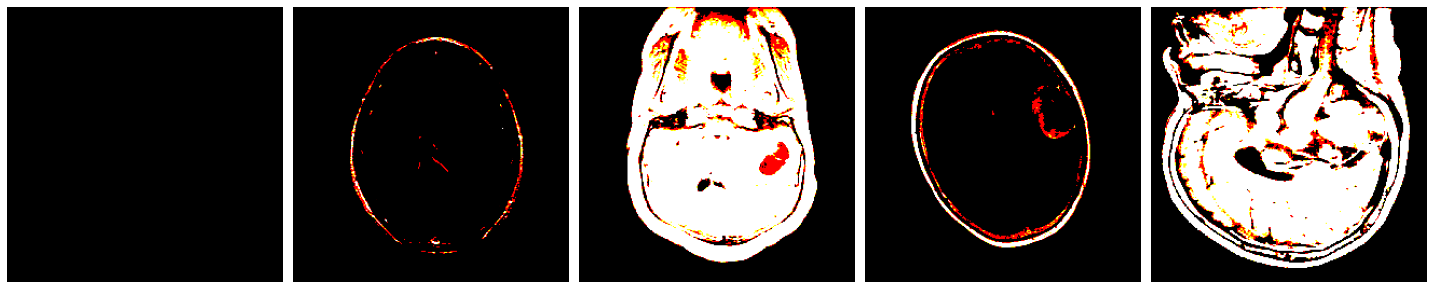

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [39]:
plotImages(imgs)
print(labels)

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [41]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [42]:
for layer in vgg16.layers:
    layer.trainable = False
    
#freezing all layers in pre-trained model

In [43]:
x = Flatten()(vgg16.output)
x = Dense(3, activation='softmax')(x)
# ouput layer

In [44]:
model = Model(inputs=vgg16.input, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [45]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(train_batches, epochs=30,verbose=2)

Epoch 1/30
575/575 - 203s - loss: 2.4116 - accuracy: 0.8705 - 203s/epoch - 354ms/step
Epoch 2/30
575/575 - 168s - loss: 1.0130 - accuracy: 0.9423 - 168s/epoch - 293ms/step
Epoch 3/30
575/575 - 167s - loss: 0.7846 - accuracy: 0.9578 - 167s/epoch - 290ms/step
Epoch 4/30
575/575 - 169s - loss: 0.6750 - accuracy: 0.9662 - 169s/epoch - 294ms/step
Epoch 5/30
575/575 - 176s - loss: 0.5614 - accuracy: 0.9712 - 176s/epoch - 306ms/step
Epoch 6/30
575/575 - 176s - loss: 0.5796 - accuracy: 0.9714 - 176s/epoch - 306ms/step
Epoch 7/30
575/575 - 177s - loss: 0.5732 - accuracy: 0.9748 - 177s/epoch - 308ms/step
Epoch 8/30
575/575 - 179s - loss: 0.6174 - accuracy: 0.9753 - 179s/epoch - 311ms/step
Epoch 9/30
575/575 - 181s - loss: 0.4860 - accuracy: 0.9794 - 181s/epoch - 315ms/step
Epoch 10/30
575/575 - 178s - loss: 0.5441 - accuracy: 0.9803 - 178s/epoch - 309ms/step
Epoch 11/30
575/575 - 171s - loss: 0.5421 - accuracy: 0.9826 - 171s/epoch - 297ms/step
Epoch 12/30
575/575 - 169s - loss: 0.4450 - accuracy

In [47]:
val_loss, val_acc = model.evaluate(valid_batches)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

26/26 [==============================] - 164s 7s/step - loss: 11.3105 - accuracy: 0.9372
Validation Loss: 11.310506820678711
Validation Accuracy: 0.9371980428695679


In [48]:
model.save('/content/', 'VGG16')

In [51]:
from tensorflow.keras.models import load_model
import os.path

if os.path.isfile('/content/medical_trial_brain.h5') is False:
  model.save('/content/medical_trial_brain.h5')


new_model = load_model('/content/medical_trial_brain.h5')

In [53]:
# Test dataset path
test_path = '/content/drive/MyDrive/Testing'

In [63]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(265,256),classes=['Glioma','Meningioma','Pituitary_tumor'],batch_size=32)

Found 4117 images belonging to 3 classes.


In [64]:
# Testing model
predictions = model.predict(test_batches)
print("Predictions:", predictions)
print("Ground Truth Labels:", test_batches.classes)

129/129 [==============================] - 36s 252ms/step
Predictions: [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
Ground Truth Labels: [0 0 0 ... 2 2 2]


In [56]:
print(test_batches.num_classes)
print(test_batches.class_indices)
assert test_batches.num_classes == 3

3
{'Glioma': 0, 'Meningioma': 1, 'Pituitary_tumor': 2}


In [57]:
np.unique(test_batches.classes)

array([0, 1, 2], dtype=int32)

In [58]:
print(ytest)

[0 0 0 ... 2 2 2]


In [ ]:
# import seaborn as sns
# # Creating  a confusion matrix,which compares the y_test and y_pred
# cm = confusion_matrix(test_batches.classes, predictions)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['Glioma','Pituitory_tumor ','Meningioma'], 
#                      columns = ['Glioma','Pituitory_tumor ','Meningioma'])
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()
# print("Confusion Matrix:\n", cm)

In [65]:
rounded_predictions = np.argmax(predictions,axis=1)
# print(test_batches[0][0])

In [66]:
loss, accuracy = model.evaluate(test_batches)

129/129 [==============================] - 29s 221ms/step - loss: 29.1368 - accuracy: 0.9174


In [67]:
print("loss: ", loss)
print("accuracy: ",  accuracy)

loss:  29.136837005615234
accuracy:  0.9174156188964844


In [68]:
test_batches.classes.ndim

1

In [69]:
from sklearn.metrics import classification_report
y_pred = np.argmax(predictions, axis=1)

# Get the true class labels
y_true = test_batches.classes

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32      1321
           1       0.33      0.32      0.33      1339
           2       0.35      0.39      0.37      1457

    accuracy                           0.34      4117
   macro avg       0.34      0.34      0.34      4117
weighted avg       0.34      0.34      0.34      4117



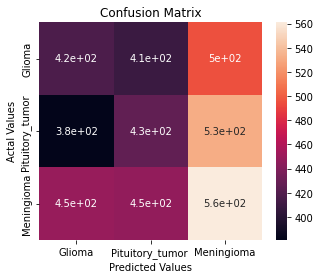

Confusion Matrix:
 [[417 409 495]
 [381 426 532]
 [449 447 561]]


In [70]:
preds_classes = np.argmax(predictions, axis=1)

# Get the true class indices
true_classes = test_batches.classes

# Get the class labels
class_labels = list(test_batches.class_indices.keys())
cm = confusion_matrix(true_classes, preds_classes)

cm_df = pd.DataFrame(cm,
                     index = ['Glioma','Pituitory_tumor ','Meningioma'], 
                     columns = ['Glioma','Pituitory_tumor ','Meningioma'])


plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
print("Confusion Matrix:\n", cm)